<a href="https://colab.research.google.com/github/scadusseau/RL-Algorithms-generalization-framework-/blob/master/Test_emballage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation

In [0]:
#Voici les differentes importations dont cette solution a besoin
#You can find here the different librairies needed to make the solution working.

#Importations basiques et génériques
#Basicals importations
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2
import random as rand
import pandas as pd

#Pour l'agent et spécifiquement le petit réseau de neurones.
#For the agent and specifically the little neurals network.
from keras.layers import Dense, Activation
from keras.models import Sequential, load_model
from keras.optimizers import Adam

#Pour creer le lien avec google drive
#In order to create a link with google drive
from google.colab import drive

Using TensorFlow backend.


In [0]:
#Pour monter notre volume google drive
#In order to mount our google drive volume
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Pre environement chat

In [0]:
class chat_pre_env:
  def __init__(self):
    # Nombres d'étapes max dans l'épisode
    # Maximum steps in one episode
    self.nb_tour_max = 7000
    self.iter = 0

    # La vitesse de déplacement des points
    # The deplacement speed of points
    self.depl = 1

    # Les actions
    # The actions
    self.nb_actions = 16
    self.list_actions = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

    # Lecture de l'image
    # Image reading
    self.id = 5
    self.ETAT = np.array(Image.open('/content/gdrive/My Drive/CAT_00/('+ str(self.id) +').jpg'), dtype=np.uint8)

    self.dimensions = self.ETAT.shape

    # Initialisation aléatoire des points
    # Setting up the points randomly
    self.P1 = [rand.randrange(0, int(self.dimensions[0]/2) )  ,  rand.randrange(0, int(self.dimensions[1]/2) ) ]
    self.P2 = [rand.randrange(1+ int(self.dimensions[0]/2) , self.dimensions[0])  ,  rand.randrange(1+ int(self.dimensions[1]/2) , self.dimensions[1]-20)]

    # Importation des informations du fichier d'information de l'image (les points important du chat)
    # Catching infoFile informations (the important points of the cat)
    self.infoFile = open('/content/gdrive/My Drive/CAT_00/('+ str(self.id) +').cat', 'r')
    self.infoString = self.infoFile.read()
    self.info = []
    j=0
    temp = ""
    for i in range (len(self.infoString)):
      if (self.infoString[i] == ' '):
        self.info.append(int(temp))
        temp = ""
      else:
        temp = temp + self.infoString[i]
    self.infoFile.close()

    # Fabrication du rectangle minimal
    # Making up of the minimal rectangle
    self.Rect = self.minAreaRect(self.info)

    # Definition de l'état de départ
    # First state initialisation
    self.ETAT = self.drawing_rect(self.ETAT, self.P1, self.P2)

    self.recompense=-1000;


  """
  # FONCTIONS PRIMORDIALES (fonctions piliers)
  # MOST IMPORTANT FUNCTIONS (based functions)
  """

  def preprocess(self, img):
    return np.matrix.flatten(cv2.resize(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), (84, 90)))

  def envAction(self, action):
    self.iter = self.iter + 1

    if (action == 0):
      if (self.P1[0] + self.depl <= self.dimensions[0] and self.P1[0] + self.depl >= 0):
        self.P1[0] = self.P1[0] + self.depl
    if (action == 1):
      if (self.P1[0] - self.depl <= self.dimensions[0] and self.P1[0] - self.depl >= 0):
        self.P1[0] = self.P1[0] - self.depl
    if (action == 2):
      if (self.P1[1] + self.depl <= self.dimensions[1] and self.P1[1] + self.depl >= 0):
        self.P1[1] = self.P1[1] + self.depl
    if (action == 3):
      if (self.P1[1] - self.depl <= self.dimensions[1] and self.P1[1] - self.depl >= 0):
        self.P1[1] = self.P1[1] - self.depl
    if (action == 4):
      if (self.P2[0] + self.depl <= self.dimensions[0] and self.P2[0] + self.depl >= 0):
        self.P2[0] = self.P2[0] + self.depl
    if (action == 5):
      if (self.P2[0] - self.depl <= self.dimensions[0] and self.P2[0] - self.depl >= 0):
        self.P2[0] = self.P2[0] - self.depl
    if (action == 6):
      if (self.P2[1] + self.depl <= self.dimensions[1] and self.P2[1] + self.depl >= 0):
        self.P2[1] = self.P2[1] + self.depl
    if (action == 7):
      if (self.P2[1] - self.depl <= self.dimensions[1] and self.P2[1] - self.depl >= 0):
        self.P2[1] = self.P2[1] - self.depl
    if (action == 8):
      if (self.P1[0] + self.depl*5 <= self.dimensions[0] and self.P1[0] + self.depl*5 >= 0):
        self.P1[0] = self.P1[0] + self.depl*5
    if (action == 9):
      if (self.P1[0] - self.depl*5 <= self.dimensions[0] and self.P1[0] - self.depl*5 >= 0):
        self.P1[0] = self.P1[0] - self.depl*5
    if (action == 10):
      if (self.P1[1] + self.depl*5 <= self.dimensions[1] and self.P1[1] + self.depl*5 >= 0):
        self.P1[1] = self.P1[1] + self.depl*5
    if (action == 11):
      if (self.P1[1] - self.depl*5 <= self.dimensions[1] and self.P1[1] - self.depl*5 >= 0):
        self.P1[1] = self.P1[1] - self.depl*5
    if (action == 12):
      if (self.P2[0] + self.depl*5 <= self.dimensions[0] and self.P2[0] + self.depl*5 >= 0):
        self.P2[0] = self.P2[0] + self.depl*5
    if (action == 13):
      if (self.P2[0] - self.depl*5 <= self.dimensions[0] and self.P2[0] - self.depl*5 >= 0):
        self.P2[0] = self.P2[0] - self.depl*5
    if (action == 14):
      if (self.P2[1] + self.depl*5 <= self.dimensions[1] and self.P2[1] + self.depl*5 >= 0):
        self.P2[1] = self.P2[1] + self.depl*5
    if (action == 15):
      if (self.P2[1] - self.depl*5 <= self.dimensions[1] and self.P2[1] - self.depl*5 >= 0):
        self.P2[1] = self.P2[1] - self.depl*5

    self.ETAT = np.array(Image.open('/content/gdrive/My Drive/CAT_00/('+ str(self.id) +').jpg'), dtype=np.uint8)
    self.ETAT = self.drawing_rect(self.ETAT, self.P1, self.P2)

  def envRecompense(self):
    return -self.euclidianDist(self.P1,self.Rect[0]) - self.euclidianDist(self.P2,self.Rect[1])

  def envTerminaison(self):
    done = False

    reward = -self.euclidianDist(self.P1,self.Rect[0]) - self.euclidianDist(self.P2,self.Rect[1])
    if (self.recompense == 0):
      done = True
    if (self.iter == self.nb_tour_max):
      done = True
    return done

  # La fonction pour mettre à zero l'environnement
  # The function to bring back to zero the environment
  def envReset(self):
    self.iter = 0
    self.ETAT = np.array(Image.open('/content/gdrive/My Drive/CAT_00/('+ str(self.id) +').jpg'), dtype=np.uint8)

    self.dimensions = self.ETAT.shape

    self.P1 = [rand.randrange(0, int(self.dimensions[0]/2) )  ,  rand.randrange(0, int(self.dimensions[1]/2) ) ]
    self.P2 = [rand.randrange(1+ int(self.dimensions[0]/2) , self.dimensions[0])  ,  rand.randrange(1+ int(self.dimensions[1]/2) , self.dimensions[1]-20)]


  """
  # Fonctions d'aide au fonctionnement
  # Functions helping to work
  """


  #Trouver le rectangle minimum à partir de plusieurs points
  #Python finding the minimum rectangle out of multiple points
  def minAreaRect(self, A):
    X1,Y1 = 10000,10000
    X2,Y2 = -10000, -10000
    
    for i in range(1,2*A[0]):
      if (i%2 == 0):
        if (A[i] < Y1):
          Y1 = A[i]
        if (A[i] > Y2):
          Y2 = A[i]
      else:
        if (A[i] < X1):
          X1 = A[i]
        if (A[i] > X2):
          X2 = A[i]
    Y2 = Y2 + 20
    return [[X1,Y1],[X2,Y2]]

  #Trouver hauteur et largeur d'un rectangle
  #Finding width and height
  def WandH(self, P1, P2):
    return [P2[0]-P1[0],P2[1]-P1[1]]

  # Fonction de calcul de distance euclidienne pour la récompense
  # Euclidian distance calcul for reward making
  def euclidianDist(self, R1, R2):
    return ((R2[0] - R1[0])**2 + (R2[1] - R1[1])**2)**(1/2)

  # Fonction de dessin d'un rectangle sur l'image
  # Function of drawing rectangle in the image
  def drawing_rect(self, image, P1, P2):
    cv2.rectangle(image, (P1[0],P1[1]), (P2[0],P2[1]), (255,255,255), thickness=3, lineType=8, shift=0)
    return image


  '''
  # Fonctions optionnelles
  # Optionnal functions
  '''


  # Fonction d'affichage de l'état de l'environnement
  # Displaying the state of the environment
  def affiche(self):
    print("Dimension " + str(self.dimensions[0]) + " " + str(self.dimensions[1])) 
    print("P1 " + str(self.P1))
    print("P2 " + str(self.P2))
    fig,ax = plt.subplots(1)
    ax.imshow(self.ETAT)
    plt.show()
    plt.close()

  # Fonction d'affichage de l'objectif à atteindre
  # Displaying of the goal to achieve
  def affiche_objectif(self):
    print("Dimension " + str(self.dimensions[0]) + " " + str(self.dimensions[1])) 
    print("P1 objectif " + str(self.Rect[0]))
    print("P2 objectif " + str(self.Rect[1]))

    print("Les distances :")
    print("P1 et Rect[0] " + str(self.P1) + " " + str(self.Rect[0]) + " distance -> " + str(self.euclidianDist(self.P1,self.Rect[0])))
    print("P2 et Rect[1] " + str(self.P2) + " " + str(self.Rect[1]) + " distance -> " + str(self.euclidianDist(self.P2,self.Rect[1])))

    #fig,ax = plt.subplots(1)

    #self.image_obj = np.array(Image.open('/content/gdrive/My Drive/CAT_00/('+ str(self.id) +').jpg'), dtype=np.uint8)
    #self.image_obj = self.drawing_rect(self.image_obj , self.Rect[0], self.Rect[1])

    #ax.imshow(self.image_obj )
    #plt.show()
    #plt.close()

# Pre environement foot

In [0]:
class Leo5:
    """
    Description:
        A National soccer team is competing against other teams worldwide, in order to be the best team of the world.
        Each team's level is evaluated with a score (the values are obtained regarding the Fifa official ranking).
        Beating a team helps to improve the score. (The best team is the best because it can beat any openent)

    Source:
        This environment is the creation of S. CADUSSEAU, for an academic research project.

    Observation: # In this version, the score doesn't vary
        Type: Table[209][3]
        Num	Observation                 Min         Max
        x::	Team Name                    /           /    (first col.)
        :x:	Team Score                   0           n    (second col.)
        ::x Encounters                   0           n    (third col.)

        
    Actions:
        Type: Discrete(209)
        Num	Action
        1	Encounter Team 1
        :
        :
        :
        209 Encounter Team 209
        
    Reward:
        Reward varies according to the results (win or loss), the level of the opponent, the number of encounters against a same team, the total number of encounters.
        R = (w * vict_pts * L) - (l * def_pts * L) - Nb_enc * penalty - enc_tot * penalty_tot
        w: win variable (0 or 1)
        l: loss variable (0 or 1)
        vict_pts (= def_pts): 100 #arbitrarly fixed
        L: probability of losing #reflects the difficulty of an encounter, but this variable could be changed by another variable that represent the same aspect.
        Nb_enc: number of encounters against a same team
        enc_tot: total of number of encounters
        penalty: coefficient that deter encountering always the same team #value fixed arbitrarly
        penalty_tot: coefficient that deter encountering too many teams, and makes the agent achieve its goal as soon as possible #value fixed arbitrarly

    Starting State:
        The ranking table is initialized with 0 for the third column

    Episode Termination:
        The agent score is equal or under 0.
        The agent score is the best (let us arbitrarly fix the best score to 2000).
    """

    def __init__(self):
      self.reward = 0
      self.enc_tot = 0
      self.ranking = pd.read_csv('Classement Fifa.csv')
      self.vict_pts = 100
      self.def_pts = 100
      self.penalty = 2
      self.penalty_tot = 1
      self.nb_actions = len(self.ranking) - 1 #211 equipes dont la notre, donc 210 equipes adverses

      self.action_space = np.array([i for i in range(1,self.nb_actions)])

      self.ETAT = np.array([self.ranking.Score,self.ranking.Rencontres])
      self.dictionnary = np.array([self.ranking.Nation])
      self.encounter_hist = []

      self.score = self.ETAT[0][self.nb_actions]

      #self.seed()


    #def seed(self, seed=None):
      #self.np_random, seed = seeding.np_random(seed)
      #return [seed]

    def preprocess(self,ETAT): # ici pas besoin de preprocessing, la fonction doit juste renvoyer l'ETAT
      return np.matrix.flatten(ETAT)

    def encounter(self,action):
      # Calculate the win\loss probabilities
      W = 1/(1 + np.exp(0.01*(self.ETAT[0][action] - self.score)))
      """if self.score - self.observation_space[0][action] >= 200:
        W = 0.9
      if self.score - self.observation_space[0][action] <= -200:
        W = 0.1
      else:
        alpha = (0.9 - 0.5)/200
        W = (self.score - self.observation_space[0][action])*alpha + 0.5
      """
      L = 1 - W

      l = 0
      w = 1

      # Evaluating the end result
      res = np.random.rand()
      if res > W: #if res is higher than the probability of winning, then the encounter is lost
        l = 1
        w = 0

      self.ETAT[1][action] += 1
      self.encounter_hist.append([self.dictionnary[0][action],self.ETAT[0][action],w,self.score,L])

      return[L,l,w]

    def envRecompense(self):
      return self.reward

    def envTerminaison(self):
      end = False

      if ((self.enc_tot > 180) or (self.score > self.ETAT[0][0]) or (self.score < 800)):
        end = True
      
      return end

    def envAction(self,action):
      self.reward = 0
      result = self.encounter(action)
      L,l,w = result[0],result[1],result[2]
      Nb_enc = self.ETAT[1][action] #if we want the first encounter = 0
      self.enc_tot += 1

      """      print("Leo5 (" + str(self.score) + "pts) affronte " + self.dictionnary[0][action] + " (" + str(self.ETAT[0][action]) +"pts).") """
      #reward = (w * self.vict_pts * 1) - (l * self.def_pts * L**2) - Nb_enc * self.penalty - enc_tot * self.penalty_tot

      self.reward = (w * self.vict_pts * L) - (l * self.def_pts * L) - Nb_enc * self.penalty
      self.score += self.reward

      #if(self.score < 1000):
       # self.score = 1000

      self.ETAT[0][self.nb_actions] = self.score

      

    """      if(w == 1):
        print("Leo5 gagne la rencontre et gagne " + str(self.reward) + "pts, obtenant le score total de " + str(self.score) + "pts.")
      else:
        print("Leo5 perd la rencontre et perd " + str(self.reward) + "pts, obtenant le score total de " + str(self.score) + "pts.")"""


    def affiche(self):
      print("\n===================")
      print(self.score)
      print("===================\n")
      print()
    
    def envReset(self):
      self.enc_tot = 0
      self.reward = 0
      self.ETAT = np.array([self.ranking.Score,self.ranking.Rencontres])
      self.score = 1200
      self.encounter_hist = []
      """      print(self.ETAT)"""





# Emballage env

In [0]:
class emballeur():
  def __init__(self, pre_env):
    self.pre_env = pre_env
    self.NBactions = pre_env.nb_actions
    self.ETAT = self.pre_env.preprocess(self.pre_env.ETAT)

  def step(self, action):
    self.pre_env.envAction(action)
    self.ETAT = self.pre_env.preprocess(self.pre_env.ETAT)
    recompense = self.pre_env.envRecompense()
    done = self.pre_env.envTerminaison()

    return self.ETAT, recompense, done

  def reset(self):
    self.pre_env.envReset()

  def affiche(self):
    self.pre_env.affiche()

# ALGO APPRENTISSAGE

In [0]:
class ReplayBuffer(object):
  def __init__(self, max_size, input_shape, n_actions, discrete=False):
    self.mem_size = max_size
    self.mem_cntr = 0
    self.input_shape = input_shape
    self.discrete = discrete
    self.state_memory = np.zeros((self.mem_size, input_shape))
    self.new_state_memory = np.zeros((self.mem_size, input_shape))
    dtype = np.int8 if self.discrete else np.float32
    self.action_memory = np.zeros((self.mem_size, n_actions), dtype = dtype)
    self.reward_memory = np.zeros(self.mem_size)
    self.terminal_memory = np.zeros(self.mem_size, dtype=np.float32)

  def store_transition(self, state, action, reward, state_, done):
    index = self.mem_cntr % self.mem_size
    self.state_memory[index] = state
    self.new_state_memory[index] = state_
    self.reward_memory[index] = reward
    self.terminal_memory[index] = 1 - int(done)
    if self.discrete:
      actions = np.zeros(self.action_memory.shape[1])
      actions[action] = 1.0
      self.action_memory[index] = actions
    else:
      self.action_memory[index] = action
    self.mem_cntr += 1

  def sample_buffer(self, batch_size):
    max_mem = min(self.mem_cntr, self.mem_size)
    batch = np.random.choice(max_mem, batch_size)

    states = self.state_memory[batch]
    states_ = self.new_state_memory[batch]
    rewards = self.reward_memory[batch]
    actions = self.action_memory[batch]
    terminal = self.terminal_memory[batch]

    return states, actions, rewards, states_, terminal

def build_dqn(lr, n_actions, input_dims, fc1_dims, fc2_dims):
  model = Sequential([Dense(fc1_dims, input_shape=(input_dims, )),
                      Activation('relu'),
                      Dense(fc2_dims),
                      Activation('relu'),
                      Dense(fc2_dims),
                      Activation('relu'),
                      Dense(fc2_dims),
                      Activation('relu'),
                      Dense(n_actions),
                      Activation('softmax')]);
  model.compile(optimizer=Adam(lr=lr), loss='mse')

  return model

class Agent(object):
  def __init__(self, alpha, gamma, n_actions, epsilon, batch_size,
               input_dims, epsilon_dec=0.99, epsilon_end=0.01,
               mem_size=5000, fname='dqn_model_CAT.h5'):
    self.action_space = [i for i in range(n_actions)]
    self.n_actions = n_actions
    self.gamma = gamma
    self.epsilon = epsilon
    self.epsilon_dec = epsilon_dec
    self.epsilon_min = epsilon_end
    self.batch_size = batch_size
    self.model_file = fname

    self.memory = ReplayBuffer(mem_size, input_dims, n_actions, discrete=True)
    self.q_eval = build_dqn(alpha, n_actions, input_dims, 256, 256)
  
  def remember(self, state, action, reward, new_state, done):
    self.memory.store_transition(state, action, reward, new_state, done)

  def choose_action(self, state):
    state = state[np.newaxis, :]
    rand = np.random.random()
    if rand < self.epsilon:
      action = np.random.choice(self.action_space)
    else:
      actions = self.q_eval.predict(state)
      action = np.argmax(actions)

    return action

  def learn(self):
    if self.memory.mem_cntr < self.batch_size:
      return
    state, action, reward, new_state, done = self.memory.sample_buffer(self.batch_size)
    action_values = np.array(self.action_space, dtype=np.int8)
    action_indices = np.dot(action, action_values)

    q_eval = self.q_eval.predict(state)
    q_next = self.q_eval.predict(new_state)

    q_target = q_eval.copy()

    batch_index = np.arange(self.batch_size, dtype=np.int32)

    q_target[batch_index, action_indices] = reward + self.gamma*np.max(q_next, axis=1)*done

    _ = self.q_eval.fit(state, q_target, verbose=0)

    self.epsilon = self.epsilon*self.epsilon_dec if self.epsilon > self.epsilon_min else self.epsilon_min

  def save_model(self):
    path = "/content/gdrive/My Drive/"+self.model_file 
    self.q_eval.save(path)

  def load_model(self):
    path = "/content/gdrive/My Drive/"+self.model_file  
    self.q_eval = load_model(path)

# TEST foot

In [0]:
env = emballeur(Leo5())

n_games = 10000

agent = Agent(gamma=0.70, epsilon=1.0, alpha=0.0005, batch_size=1000, input_dims=211*2, n_actions = 210,
              epsilon_end=0.2, fname='DQN_Leo5_test.h5', mem_size=500)

#print("loading")
#agent.load_model()
#print("loaded")

points = 0

scores = []
eps_history = []

n_partie = 0

list_rewards = []

for i in range(n_games):
  n_partie = n_partie + 1
  print("Nouvelle partie " + str(n_partie))
  print()
  done = False
  observation = env.ETAT
  while not done:
    action = agent.choose_action(observation)
    observation_, reward, done = env.step(action)

    scores.append(reward)
    agent.remember(observation, action, reward, observation_, done)
    observation = observation_


    agent.learn()
    #print(str(action) + " " + str(reward))


  print(env.affiche())
  env.reset()


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.


None
Nouvelle partie 9446


794.0223421543226


None
Nouvelle partie 9447


718.1958907969965


None
Nouvelle partie 9448


794.8172503598805


None
Nouvelle partie 9449


710.6954811069857


None
Nouvelle partie 9450


790.0661763209581


None
Nouvelle partie 9451


790.0661763209581


None
Nouvelle partie 9452


790.0661763209581


None
Nouvelle partie 9453


721.5133946963426


None
Nouvelle partie 9454


790.0661763209581


None
Nouvelle partie 9455


790.0661763209581


None
Nouvelle partie 9456


790.0661763209581


None
Nouvelle partie 9457


765.9208801846498


None
Nouvelle partie 9458


790.0661763209581


None
Nouvelle partie 9459


706.8902979273846


None
Nouvelle partie 9460


695.3176829485034


None
Nouvelle partie 9461


711.5278693911976


None
Nouvelle partie 9462


795.6134590279951


None
Nouvelle partie 9463


790.0661763209581


None
Nouvelle partie 9464


790.0661763209581


None
Nou

# TEST chat





loading








loaded
Nouvelle partie 1

..............
Objectif -> 
Dimension 333 500
P1 [300, 27]
P2 [298, 342]


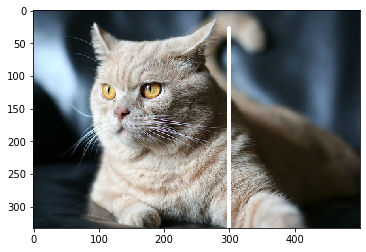

-361.72268219940963

 SCORE MOYEN 
1
-361.72268219940963

saving
saved

reseting
reset !
Nouvelle partie 2

..............
Objectif -> 
Dimension 333 500
P1 [6, 26]
P2 [171, 85]


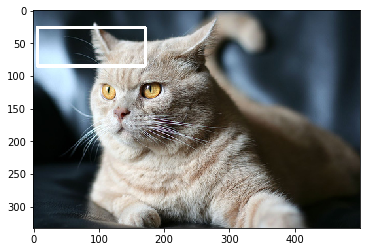

-240.02567661005133

 SCORE MOYEN 
2
-300.8741794047305

saving
saved

reseting
reset !
Nouvelle partie 3

..............
Objectif -> 
Dimension 333 500
P1 [75, 145]
P2 [15, 78]


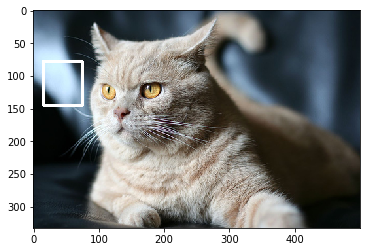

-425.4168154063942

 SCORE MOYEN 
3
-342.38839140528506

saving
saved

reseting
reset !
Nouvelle partie 4

..............
Objectif -> 
Dimension 333 500
P1 [333, 228]
P2 [244, 28]


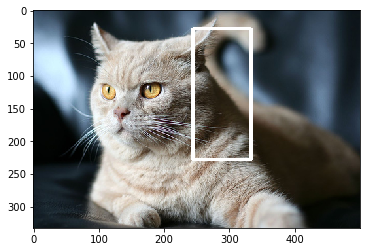

-490.09837581238787

 SCORE MOYEN 
4
-379.3158875070608

saving
saved

reseting
reset !
Nouvelle partie 5

..............
Objectif -> 
Dimension 333 500
P1 [46, 71]
P2 [320, 443]


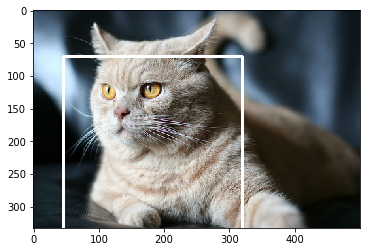

-334.7776809068331

 SCORE MOYEN 
5
-370.40824618701527

saving
saved

reseting
reset !
Nouvelle partie 6

..............
Objectif -> 
Dimension 333 500
P1 [137, 230]
P2 [322, 313]


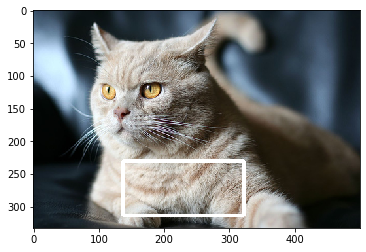

-355.93997482257737

 SCORE MOYEN 
6
-367.9968676262756

saving
saved

reseting
reset !
Nouvelle partie 7

..............
Objectif -> 
Dimension 333 500
P1 [5, 242]
P2 [330, 1]


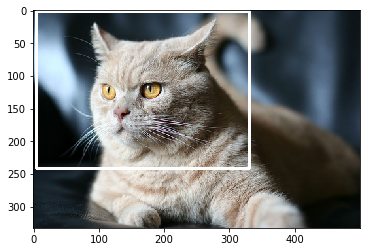

-443.3449734650018

 SCORE MOYEN 
7
-378.7608827460936

saving
saved

reseting
reset !
Nouvelle partie 8

..............
Objectif -> 
Dimension 333 500
P1 [76, 230]
P2 [37, 0]


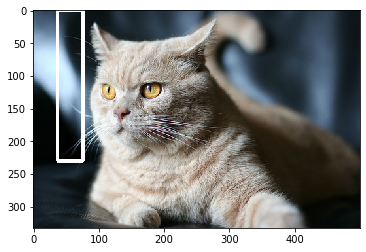

-530.2902093962174

 SCORE MOYEN 
8
-397.7020485773591

saving
saved

reseting
reset !
Nouvelle partie 9

..............
Objectif -> 
Dimension 333 500
P1 [265, 209]
P2 [181, 275]


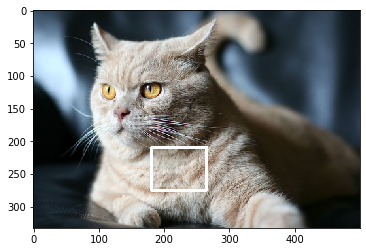

-395.68169025114116

 SCORE MOYEN 
9
-397.4775643188905

saving
saved

reseting
reset !
Nouvelle partie 10

..............
Objectif -> 
Dimension 333 500
P1 [0, 420]
P2 [323, 407]


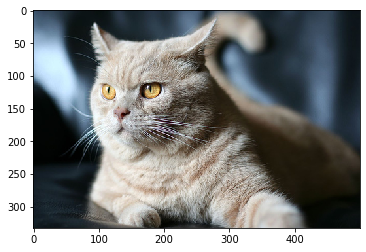

-643.3995640122598

 SCORE MOYEN 
10
-422.0697642882275

saving
saved

reseting
reset !
Nouvelle partie 11

..............
Objectif -> 
Dimension 333 500
P1 [15, 275]
P2 [328, 461]


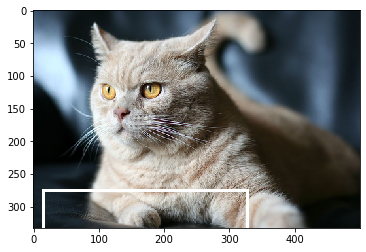

-553.231083983552

 SCORE MOYEN 
11
-433.993520624166

saving
saved

reseting
reset !
Nouvelle partie 12

..............
Objectif -> 
Dimension 333 500
P1 [98, 3]
P2 [301, 256]


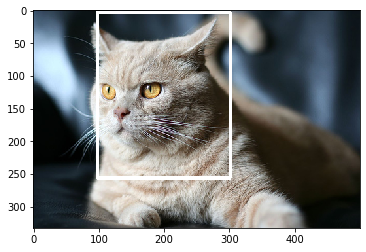

-77.73163410156002

 SCORE MOYEN 
12
-404.30503008061555

saving
saved

reseting
reset !
Nouvelle partie 13

..............
Objectif -> 
Dimension 333 500
P1 [131, 4]
P2 [213, 435]


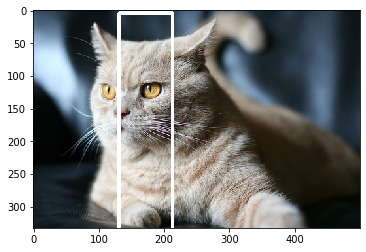

-293.5529263799119

 SCORE MOYEN 
13
-395.7856374882537

saving
saved

reseting
reset !
Nouvelle partie 14

..............
Objectif -> 
Dimension 333 500
P1 [60, 4]
P2 [307, 102]


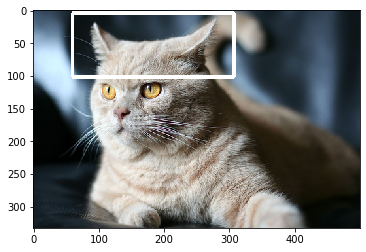

-124.17862089377235

 SCORE MOYEN 
14
-376.3851363029336

saving
saved

reseting
reset !
Nouvelle partie 15

..............
Objectif -> 
Dimension 333 500
P1 [6, 0]
P2 [325, 351]


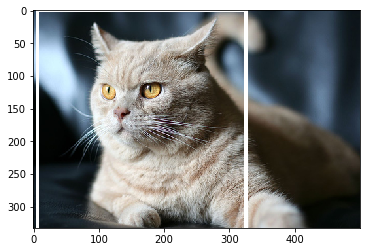

-255.33327496462587

 SCORE MOYEN 
15
-368.3150122137131

saving
saved

reseting
reset !
Nouvelle partie 16

..............
Objectif -> 
Dimension 333 500
P1 [326, 1]
P2 [192, 64]


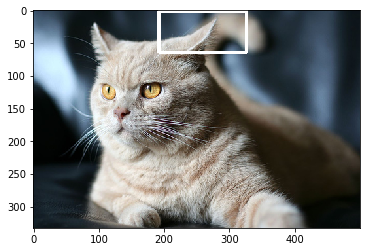

-386.5843578777314

 SCORE MOYEN 
16
-369.4568463177142

saving
saved

reseting
reset !
Nouvelle partie 17

..............
Objectif -> 
Dimension 333 500
P1 [312, 0]
P2 [185, 242]


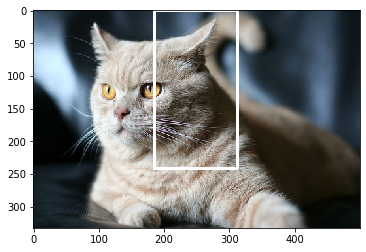

-328.8434144886005

 SCORE MOYEN 
17
-367.06782091600166

saving
saved

reseting
reset !
Nouvelle partie 18

..............
Objectif -> 
Dimension 333 500
P1 [125, 4]
P2 [280, 211]


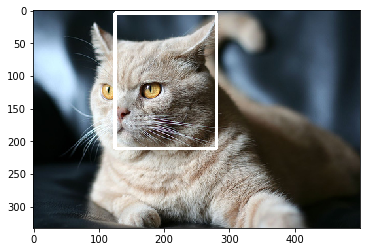

-54.41098502694853

 SCORE MOYEN 
18
-349.69799669994313

saving
saved

reseting
reset !
Nouvelle partie 19

..............
Objectif -> 
Dimension 333 500
P1 [156, 0]
P2 [211, 384]


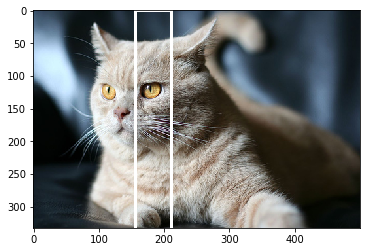

-270.8231038577959

 SCORE MOYEN 
19
-345.54668655035647

saving
saved

reseting
reset !
Nouvelle partie 20

..............
Objectif -> 
Dimension 333 500
P1 [197, 0]
P2 [190, 404]


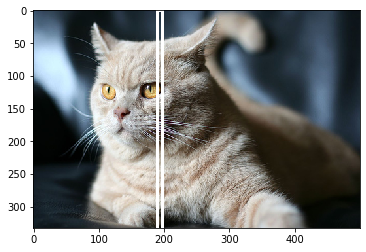

-337.85389753912386

 SCORE MOYEN 
20
-345.16204709979485

saving
saved

reseting
reset !
Nouvelle partie 21

..............
Objectif -> 
Dimension 333 500
P1 [56, 17]
P2 [1, 30]


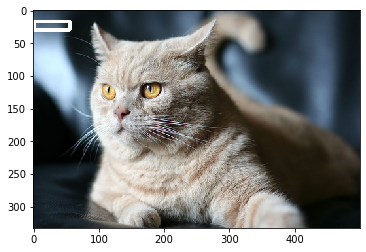

-359.85032804270526

 SCORE MOYEN 
21
-345.8614890494572

saving
saved

reseting
reset !
Nouvelle partie 22

..............
Objectif -> 
Dimension 333 500
P1 [95, 2]
P2 [73, 32]


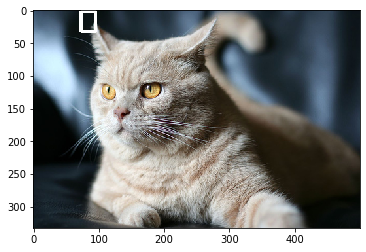

-267.88133782192097

 SCORE MOYEN 
22
-342.31693672093286

saving
saved

reseting
reset !
Nouvelle partie 23

..............
Objectif -> 
Dimension 333 500
P1 [214, 23]
P2 [267, 500]


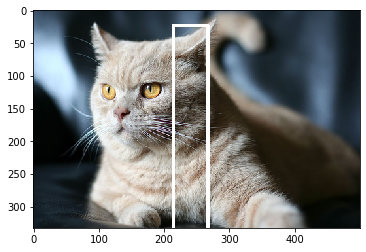

-433.12217780668357

 SCORE MOYEN 
23
-346.2649906811829

saving
saved

reseting
reset !
Nouvelle partie 24

..............
Objectif -> 
Dimension 333 500
P1 [316, 0]
P2 [265, 444]


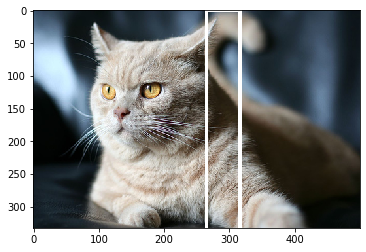

-478.6830081614546

 SCORE MOYEN 
24
-351.78240807619426

saving
saved

reseting
reset !
Nouvelle partie 25

..............
Objectif -> 
Dimension 333 500
P1 [66, 73]
P2 [333, 261]


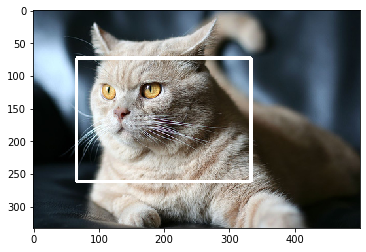

-158.2766331919471

 SCORE MOYEN 
25
-344.04217708082433

saving
saved

reseting
reset !
Nouvelle partie 26

..............
Objectif -> 
Dimension 333 500
P1 [147, 469]
P2 [333, 384]


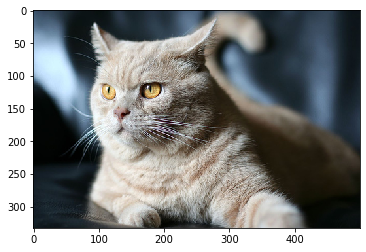

-664.9729911463387

 SCORE MOYEN 
26
-356.38566992949796

saving
saved

reseting
reset !
Nouvelle partie 27

..............
Objectif -> 
Dimension 333 500
P1 [319, 475]
P2 [0, 471]


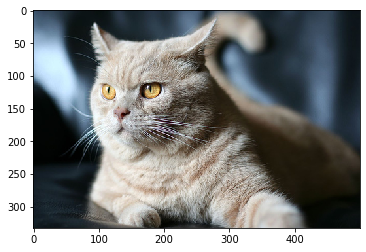

-916.01293508662

 SCORE MOYEN 
27
-377.1126056760581

saving
saved

reseting
reset !
Nouvelle partie 28

..............
Objectif -> 
Dimension 333 500
P1 [4, 0]
P2 [240, 358]


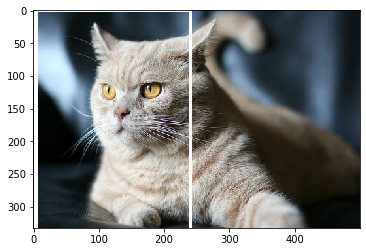

-263.35617014671766

 SCORE MOYEN 
28
-373.04987583572444

saving
saved

reseting
reset !
Nouvelle partie 29

..............
Objectif -> 
Dimension 333 500
P1 [117, 0]
P2 [307, 420]


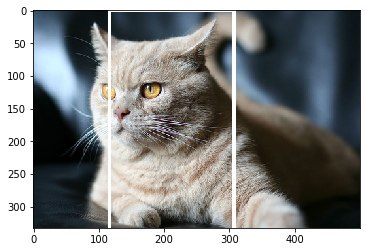

-258.0906097002813

 SCORE MOYEN 
29
-369.0857632103643

saving
saved

reseting
reset !
Nouvelle partie 30

..............
Objectif -> 
Dimension 333 500
P1 [299, 500]
P2 [247, 364]


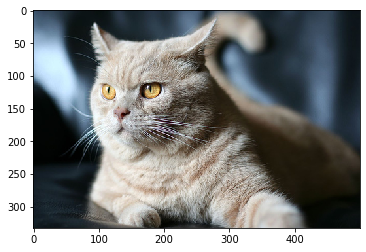

-710.7354079512197

 SCORE MOYEN 
30
-380.4740847017262

saving
saved

reseting
reset !
Nouvelle partie 31

..............
Objectif -> 
Dimension 333 500
P1 [1, 0]
P2 [319, 444]


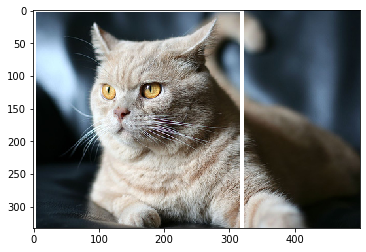

-350.2549949232181

 SCORE MOYEN 
31
-379.49927535403236

saving
saved

reseting
reset !
Nouvelle partie 32

..............
Objectif -> 
Dimension 333 500
P1 [109, 103]
P2 [332, 500]


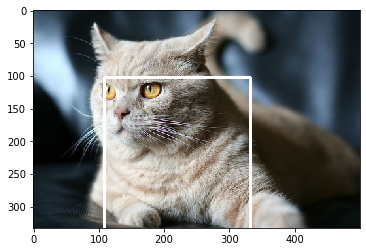

-410.5059101719056

 SCORE MOYEN 
32
-380.4682326920909

saving
saved

reseting
reset !
Nouvelle partie 33

..............
Objectif -> 
Dimension 333 500
P1 [223, 7]
P2 [332, 30]


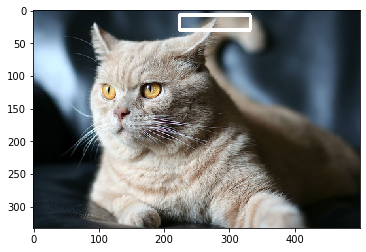

-296.994424306069

 SCORE MOYEN 
33
-377.9387233470599

saving
saved

reseting
reset !
Nouvelle partie 34

..............
Objectif -> 
Dimension 333 500
P1 [45, 15]
P2 [307, 1]


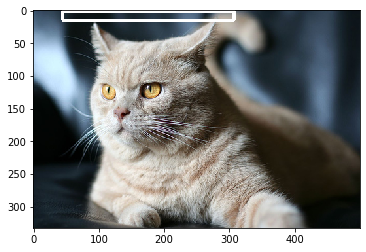

-238.162903409509

 SCORE MOYEN 
34
-373.8276698194849

saving
saved

reseting
reset !
Nouvelle partie 35

..............
Objectif -> 
Dimension 333 500
P1 [52, 37]
P2 [333, 14]


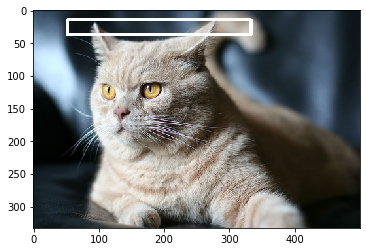

-232.21108447648868

 SCORE MOYEN 
35
-369.78148166682786

saving
saved

reseting
reset !
Nouvelle partie 36

..............
Objectif -> 
Dimension 333 500
P1 [249, 0]
P2 [292, 23]


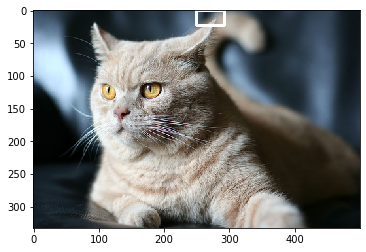

-322.6234583357058

 SCORE MOYEN 
36
-368.4715365742967

saving
saved

reseting
reset !
Nouvelle partie 37

..............
Objectif -> 
Dimension 333 500
P1 [185, 0]
P2 [326, 49]


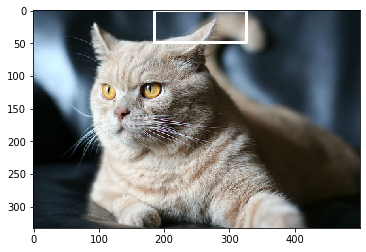

-239.4935808856204

 SCORE MOYEN 
37
-364.9856458800082

saving
saved

reseting
reset !
Nouvelle partie 38

..............
Objectif -> 
Dimension 333 500
P1 [171, 0]
P2 [322, 443]


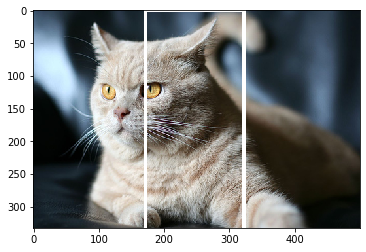

-335.8052905935786

 SCORE MOYEN 
38
-364.21774179352315

saving
saved

reseting
reset !
Nouvelle partie 39

..............
Objectif -> 
Dimension 333 500
P1 [96, 0]
P2 [273, 313]


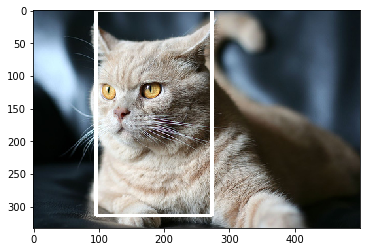

-133.74462951657767

 SCORE MOYEN 
39
-358.30817481206304

saving
saved

reseting
reset !
Nouvelle partie 40

..............
Objectif -> 
Dimension 333 500
P1 [103, 0]
P2 [305, 346]


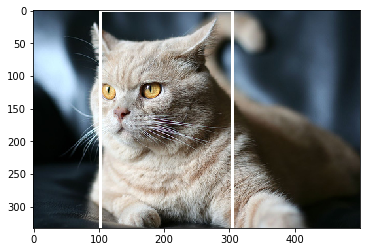

-172.2774257897596

 SCORE MOYEN 
40
-353.65740608650543

saving
saved

reseting
reset !
Nouvelle partie 41

..............
Objectif -> 
Dimension 333 500
P1 [85, 0]
P2 [290, 336]


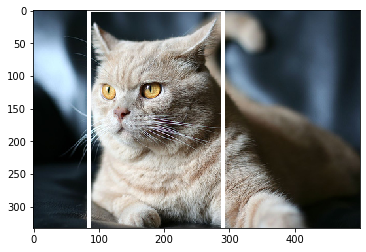

-159.3168470823952

 SCORE MOYEN 
41
-348.91739245225887

saving
saved

reseting
reset !
Nouvelle partie 42

..............
Objectif -> 
Dimension 333 500
P1 [1, 0]
P2 [271, 464]


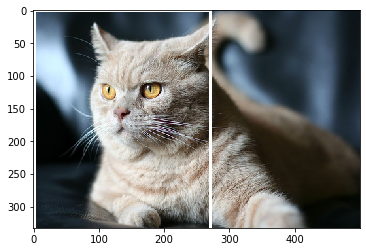

-367.6209273034333

 SCORE MOYEN 
42
-349.36271471062014

saving
saved

reseting
reset !
Nouvelle partie 43

..............
Objectif -> 
Dimension 333 500
P1 [42, 0]
P2 [229, 474]


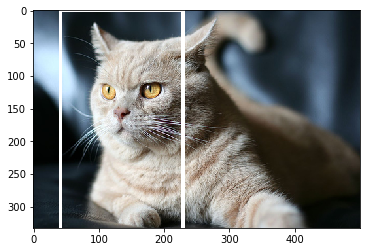

-341.49305189836457

 SCORE MOYEN 
43
-349.1796992963816

saving
saved

reseting
reset !
Nouvelle partie 44

..............
Objectif -> 
Dimension 333 500
P1 [90, 0]
P2 [318, 333]


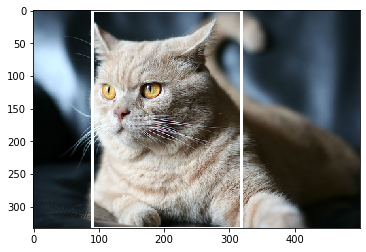

-158.1643363224701

 SCORE MOYEN 
44
-344.83844104697454

saving
saved

reseting
reset !
Nouvelle partie 45

..............
Objectif -> 
Dimension 333 500
P1 [6, 0]
P2 [292, 236]


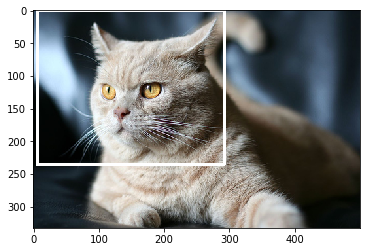

-135.7343519672682

 SCORE MOYEN 
45
-340.19168351186994

saving
saved

reseting
reset !
Nouvelle partie 46

..............
Objectif -> 
Dimension 333 500
P1 [95, 0]
P2 [285, 457]


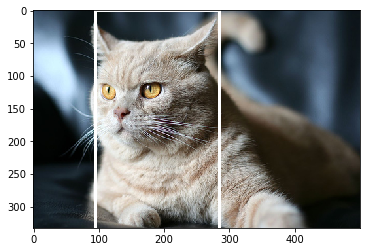

-277.24939354130817

 SCORE MOYEN 
46
-338.823372860336

saving
saved

reseting
reset !
Nouvelle partie 47

..............
Objectif -> 
Dimension 333 500
P1 [31, 0]
P2 [247, 432]


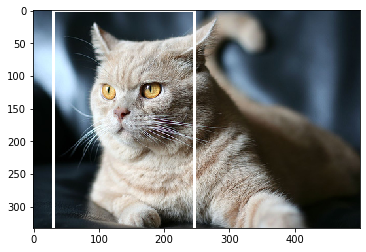

-308.0168923861767

 SCORE MOYEN 
47
-338.1679158289709

saving
saved

reseting
reset !
Nouvelle partie 48

..............
Objectif -> 
Dimension 333 500
P1 [87, 0]
P2 [285, 419]


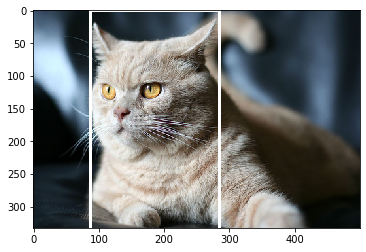

-240.85143380542036

 SCORE MOYEN 
48
-336.1404891201469

saving
saved

reseting
reset !
Nouvelle partie 49

..............
Objectif -> 
Dimension 333 500
P1 [42, 0]
P2 [282, 395]


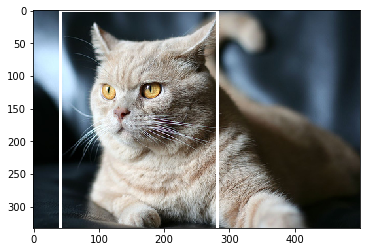

-257.7904566750633

 SCORE MOYEN 
49
-334.5415088661656

saving
saved

reseting
reset !
Nouvelle partie 50

..............
Objectif -> 
Dimension 333 500
P1 [133, 0]
P2 [285, 371]


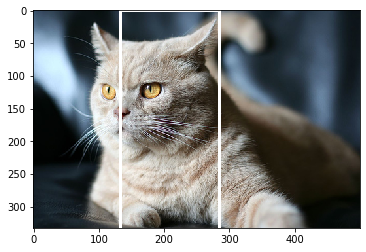

-223.04395073717774

 SCORE MOYEN 
50
-332.31155770358583

saving
saved

reseting
reset !
Nouvelle partie 51

..............
Objectif -> 
Dimension 333 500
P1 [20, 0]
P2 [330, 452]


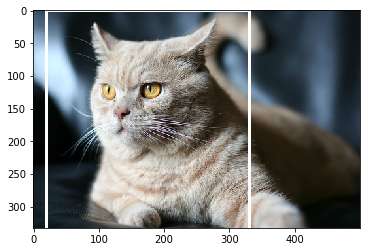

-341.07840189378066

 SCORE MOYEN 
51
-332.48345660927595

saving


OSError: ignored

In [0]:
env = emballeur(chat_pre_env())

n_games = 500

agent = Agent(gamma=0.90, epsilon=1.0, alpha=0.20, input_dims=7560, n_actions = env.NBactions,
              mem_size=80000, batch_size=500, epsilon_end=0.05, fname='DQN_CHAT5_test.h5')

print("loading")
agent.load_model()
print("loaded")

points = 0

scores = []
eps_history = []

n_partie = 0

list_rewards = []

for i in range(n_games):
  n_partie = n_partie + 1
  print("Nouvelle partie " + str(n_partie))
  print()
  done = False
  observation = env.ETAT
  while not done:
    action = agent.choose_action(observation)
    observation_, reward, done = env.step(action)

    scores.append(reward)
    agent.remember(observation, action, reward, observation_, done)
    observation = observation_

    points = points + 1

    if (points == 500):
      agent.learn()
      print(".", end = '')
      points = 0

  print()
  print("Objectif -> ")
  env.affiche()
  print(reward)

  print()
  list_rewards.append(reward)
  print(" SCORE MOYEN ")
  print(len(list_rewards))
  moyenne = sum(list_rewards)/len(list_rewards)

  print(moyenne)
  print()
  
  print("saving")
  agent.save_model()
  print("saved")

  print()

  print("reseting")
  env.reset()
  print("reset !")